# 주식가격

### - 문제설명
초 단위로 기록된 주식가격이 담긴 배열 prices가 매개변수로 주어질 때, 가격이 떨어지지 않은 기간은 몇 초인지를 return 하도록 solution 함수를 완성하세요.

### - 제한사항
* prices의 각 가격은 1 이상 10,000 이하인 자연수입니다.
* prices의 길이는 2 이상 100,000 이하입니다.

### - 입출력 예
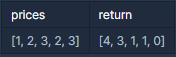

### - 입출력 예 설명
* 1초 시점의 ₩1은 끝까지 가격이 떨어지지 않았습니다.
* 2초 시점의 ₩2은 끝까지 가격이 떨어지지 않았습니다.
* 3초 시점의 ₩3은 1초뒤에 가격이 떨어집니다. 따라서 1초간 가격이 떨어지지 않은 것으로 봅니다.
* 4초 시점의 ₩2은 1초간 가격이 떨어지지 않았습니다.
* 5초 시점의 ₩3은 0초간 가격이 떨어지지 않았습니다.

### 풀이 1 - Brute Force

먼저 answer라는 리스트를 0으로 모두 초기화해두면 더 편하게 연산이 가능해진다.

2중 for문을 사용하여 현 시점에서 이후의 시점들 모두를 비교하면서 가격이 떨어졌는지 확인하도록 한다.

In [60]:
def solution(prices):
    answer = [0 for _ in range(len(prices))]
    for i in range(len(prices)):
      for j in range(i+1, len(prices)):
        answer[i] = j-i 
        if prices[i] > prices[j]:
          break
    return answer

print(solution([1,2,3,2,3]))

[4, 3, 1, 1, 0]


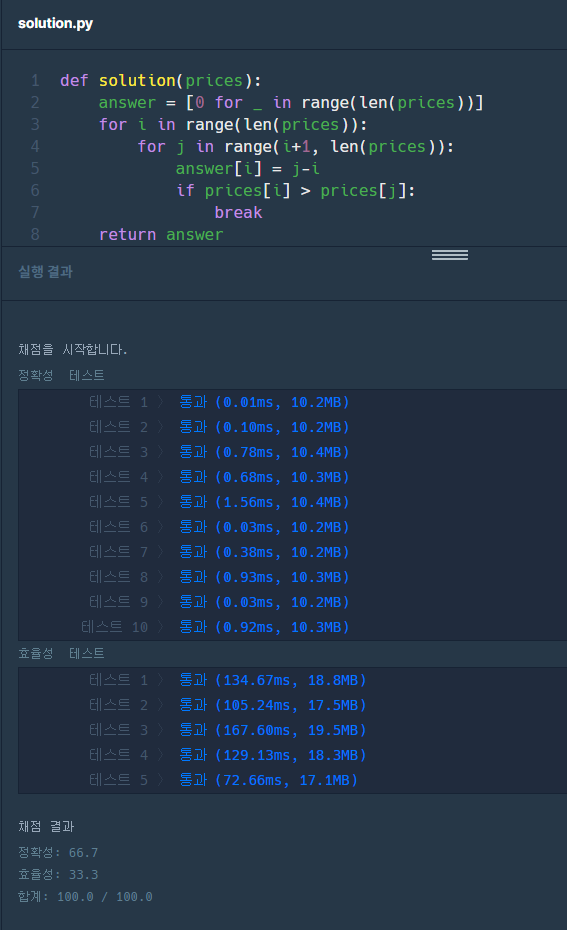

### 풀이 2 - Stack

스택에 현재 시점을 넣는다. 

1초에는 비교 대상이 없으니 넣기만 하고, 2초 때부터 연산 시작.

다음 시점의 가격이 스택에 넣은 마지막 시점의 가격보다 더 크면 스택에 쌓고(push) 작으면 꺼낸다(pop).

그리고 스택에 남아있는 값들을 꺼내서 떨어지지 않은 기간을 구하면 된다.

In [67]:
def solution(prices):
  answer = [i for i in range(len(prices)-1, -1, -1)]
  stack = [0]
  for i in range(1, len(prices)):
    while stack and prices[stack[-1]] > prices[i]:
      j = stack.pop()
      answer[j] = i - j
    stack.append(i)
  return answer

print(solution([1,2,3,2,3]))

[4, 3, 1, 1, 0]


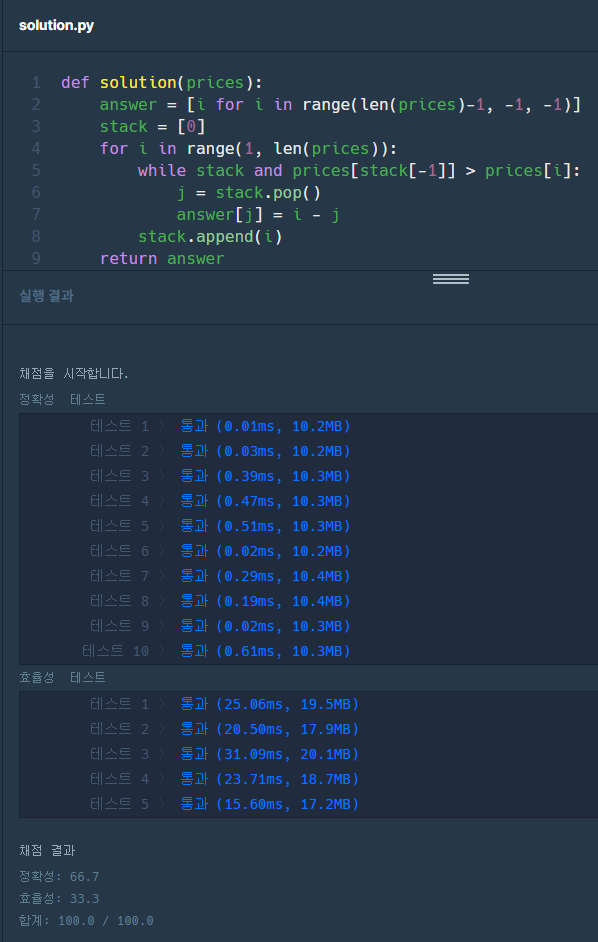

### 풀이 3 - Queue

python collections의 deque를 활용하여 Brute Force 때와 비슷하게(?) 풀어보았다.
Queue의 원소가 비워질때까지 먼저 들어간 원소를 꺼낸다(pop(0)).
그리고 그 시점의 다음 시점부터 가격이 떨어질 때까지의 시간 구하고, 그 시간을 answer에 넣어 답을 구하면 된다.

큐를 사용하니 index로 구하지 않아도 되는 것이 편한 듯하다.


In [62]:
from collections import deque
def solution(prices):
  answer = []
  prices = deque(prices)
  while prices:
    x = prices.popleft()
    time = 0
    for i in prices:
      time += 1
      if x > i:
        break
    answer.append(time)
  return answer

print(solution([1,2,3,2,3]))

[4, 3, 1, 1, 0]


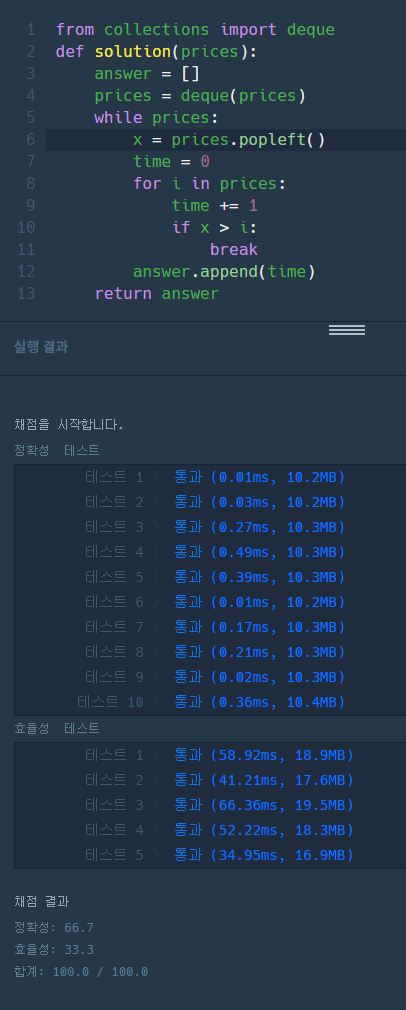